# Introduction
The analysis of the biological properties of proteins and the B-cell epitopes which is used as an important step in the development of diagnostic tests and vaccine candidates [1] are discussed in the report. The datasets used for data analysis are Sp_epitopes and proteins. The Sp_epitopes dataset consists of data describing the B-cell epitopes and the proteins dataset contains information about proteins that are related to several pathogens. The aim of this report is to understand the data, perform pre-processing techniques and visualise the data to solve the classification problem.

# Problem Definition
Type of Problem – Classification

In the protein and the epitopes dataset the problem is to distinguish the classes based on classification process. The data is preprocessed and the classification is based on the concepts of feature extraction and feature selection. The exploratory data analysis, merging relational data, data pre-processing and feature engineering and modelling are carried out in this report.

# Data Analysis Process

A short summary of the dataset.

The dataset has two csv files namely proteins and Sp_epitopes,

The number of rows and columns in the proteins dataset are 14197 rows and 10 columns and the number of rows and columns in the Sp_epitopes dataset are 7105 rows and 18 columns.

 Adequately join the protein sequences onto the epitopes table

In [100]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the two csv files using pandas
mydata1= pd.read_csv("proteins.csv")
mydata2= pd.read_csv("Sp_epitopes.csv")
#Joining the protein sequences onto the epitopes table
df=pd.merge(mydata1, mydata2, left_on="UID", right_on="protein_id", how="right")

Remove invalid observations: (i) those without corresponding protein sequences


In [101]:
#Printing information about the DataFrame
df.info()
#Dropping rows without corresponding protein sequences
df.dropna(subset = ["TSeq_sequence"], inplace=True)
#Length of the dataframe
len(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7105 entries, 0 to 7104
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSeq_seqtype    7100 non-null   object 
 1   TSeq_accver     7100 non-null   object 
 2   TSeq_taxid      7100 non-null   float64
 3   TSeq_orgname    7100 non-null   object 
 4   TSeq_defline    7100 non-null   object 
 5   TSeq_length     7100 non-null   float64
 6   TSeq_sequence   7100 non-null   object 
 7   UID             7100 non-null   object 
 8   DB              7100 non-null   object 
 9   TSeq_sid        630 non-null    object 
 10  pubmed_id       7105 non-null   int64  
 11  year            7105 non-null   int64  
 12  epit_name       7105 non-null   object 
 13  epitope_id      7105 non-null   int64  
 14  evid_code       7104 non-null   object 
 15  epit_struc_def  7105 non-null   object 
 16  sourceOrg_id    7105 non-null   int64  
 17  protein_id      7105 non-null   o

7100

In [102]:
#Shape of the dataframe
df.shape

(7100, 28)

The dimension is 7100 rows × 28 columns

removing those for which the epitope substring is not located in the correct position of the protein string (based on start_pos and end_pos)

In [103]:
#Creating a new column 'epit_seq_new' and comparing it with the 'epit_seq' to find the
#epitope substring is located in the correct position of the protein string
df['epit_seq_new'] = df.apply(lambda x:x['TSeq_sequence'][x['start_pos']-1:x['end_pos']],axis =1)
df = df[df['epit_seq']==df['epit_seq_new']]
df.shape

(7094, 29)

In [104]:
#Dropping the new column 'epit_seq_new'
df.drop("epit_seq_new", axis=1, inplace=True)
df.shape

(7094, 28)

The dimension is 7094 rows × 28 columns

removing (iii) those with start_pos < 8 or with end_pos > (TSeq_length – 8)

In [105]:
#Removing rows with start_pos < 8 or with end_pos > (TSeq_length – 8)
df = df[~((df.start_pos < 8 ) | (df.end_pos > df.TSeq_length - 8))]

In [106]:
#Printing the shape of the dataframe
print(df.shape)

(6826, 28)


The dimension is 6826 rows × 28 columns

removing those containing any non-specific aminoacid letters (namely B,J,X or Z) in the epitope sequence

In [107]:
#Removing rows with those containing any non-specific aminoacid letters (namely B,J,X or Z) in the epitope sequence
df =df[~((df.epit_seq.str.contains('X|Z|B|J')))]

In [108]:
#Printing the shape of the dataframe
print(df.shape)

(6826, 28)


The dimension is 6826 rows × 28 columns

Calculate the Class attribute for this data set based on the number of positive and negative assays (if n_Positive >= n_Negative then Class = 1, otherwise Class = 0)

In [109]:
#Class column is created based on the condition
df['Class'] = np.where(df['n_Positive']>= df['n_Negative'], 1, 0)

In [110]:
#Printing the class column
df['Class']

0       1
2       0
3       0
5       0
6       0
       ..
7098    1
7100    0
7101    1
7103    1
7104    0
Name: Class, Length: 6826, dtype: int32

Develop high-quality visualisations of the main characteristics of the resulting joined data set. The minimal requirement here is (i) a graphical investigation of Class balance

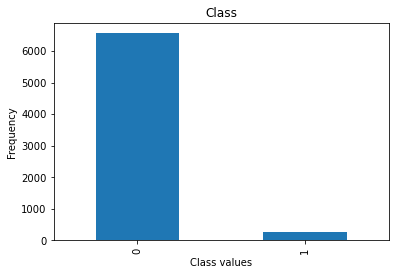

In [111]:
#Graphical investigation of Class balance
df.Class.value_counts().plot.bar()
plt.title('Class')
plt.xlabel('Class values')
plt.ylabel('Frequency')
plt.show()

The bar plot describes the class imbalance as there are 6563 values in Class 0 and only 263 values in Class 1.

# (ii) a graphical investigation of the distribution of epitope lengths

In [112]:
#Counting the values of the class column
df.Class.value_counts()

0    6563
1     263
Name: Class, dtype: int64

In [113]:
#Creating a column for the Epitome Length based on the length of the epitome sequence
df["Epitope Length"]= df["epit_seq"].str.len()

In [114]:
#Printing the head of the dataframe
df.head()

,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,...,end_pos,n_assays,host_id,bcell_id,assay_type,n_Positive,n_Negative,assay_class,Class,Epitope Length
0,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,49,2,"96,069,606","16,746,431,674,584","34,34",2,0,"1,1",1,8
2,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,...,28,1,9606,2727907,550,0,1,-1,0,15
3,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,...,105,1,9606,2727984,550,0,1,-1,0,15
5,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,...,225,1,9606,2728104,550,0,1,-1,0,15
6,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,...,140,1,9606,2728019,550,0,1,-1,0,15


In [115]:
#Calculating values of the length of the Epitope
df["Epitope Length"].value_counts()

15    6698
16      80
20      28
21       3
12       3
19       2
14       2
23       2
17       2
18       2
8        1
25       1
22       1
13       1
Name: Epitope Length, dtype: int64

<AxesSubplot:ylabel='Frequency'>

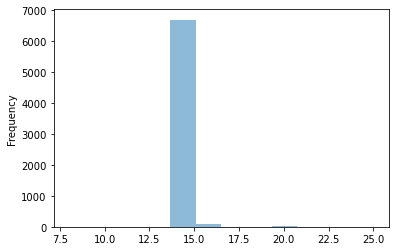

In [116]:
#Histogram of the distribution of epitope lengths
df["Epitope Length"].plot.hist(bins=12, alpha=0.5)

The histogram clearly shows the frequency of the epitope sequence. The maximum frequency of the length of the epitope sequence is 15 characters.

# (iii) A grouped bar chart of the frequencies (%) of each aminoacid letter in Positive vs Negative observations. 

In [117]:
#Printing the epitome sequence
df['epit_seq']

0                   LTSRPAHG
2            ALSLVPLATAQAQEW
3            ANYNQHGQATNLTVQ
5            APTSANRPVPNESAS
6            ASATSQPTVPMAPPA
                ...         
7098            ASREAKKQVEKA
7100    QAKLEAEAKALKEQLAKQAE
7101          QKSKQNIGALKQEL
7103            RRDLDASREAKK
7104    SDSQTPDTKPGNKAVPGKGQ
Name: epit_seq, Length: 6826, dtype: object

In [118]:
#Printing the value counts of epitope sequence
df['epit_seq'].value_counts()

LRRDLDASREAKKQVEKALE    4
PDKKPETKPEQDGSG         3
RDLDASREAKKQVEK         3
LRRDLDASREAKKQV         3
RRDLDASREAKKQVE         3
                       ..
ADLKLNEQHIPEAIA         1
ACQSRGNGTYPIKTK         1
AASQGTSKVADPHHH         1
AAMATKAKESAQEAS         1
SDSQTPDTKPGNKAVPGKGQ    1
Name: epit_seq, Length: 6771, dtype: int64

In [119]:
#The epitope sequence is stripped and splitted to characters
s = df.epit_seq.str.strip().str.split('').explode().value_counts()
#Sorted the epitope sequence based on the Alphabetic order
ss =s.sort_index()
#Created an array
ss1 = ss.array
#Total number of characters
total = ss1[1:]
total

<PandasArray>
[11610,   107,  6900,  7939,  2627,  5445,  1822,  4791,  8728,  8717,  1310,
  5398,  4181,  5121,  3070,  7976,  7336,  5966,   617,  2998]
Length: 20, dtype: int64

In [120]:
#Created a new dataframe with class 0 values only
newdf = df[df['Class'] == 0]

In [121]:
#Created a new dataframe with class 1 values only
newdf1 = df[df['Class'] == 1]

In [122]:
#The epitope sequence is stripped and splitted to characters of class 0
s1 = newdf.epit_seq.str.strip().str.split('').explode().value_counts() 
#Sorted the epitope sequence based on the Alphabetic order
s11=s1.sort_index()
#Created an array
s12= s11.array
s13 = s12[1:]
#Displaying the count of characters of class 0
s13

<PandasArray>
[11045,   107,  6513,  7457,  2617,  5357,  1791,  4643,  8271,  8353,  1276,
  5224,  4076,  4856,  2846,  7644,  7051,  5859,   609,  2964]
Length: 20, dtype: int64

In [123]:
#The epitope sequence is stripped and splitted to characters of class 1
s2 = newdf1.epit_seq.str.strip().str.split('').explode().value_counts() 
#Sorted the epitope sequence based on the Alphabetic order
s21=s2.sort_index()
#Created an array
s22 = s21.array
s23 = s22[1:]
#Inserted the value of character'C' as 0
s24=s23.insert(1,0)
#Displaying the count of characters of class 1
s24


<PandasArray>
[565,   0, 387, 482,  10,  88,  31, 148, 457, 364,  34, 174, 105, 265, 224,
 332, 285, 107,   8,  34]
Length: 20, dtype: int64

In [124]:
#Creating a list of frequencies (%) of each aminoacid letter in Positive observations
out1 = (np.divide(s13,total)*100)
ls1 = np.array(list(map(float, out1)))
list1 = ls1.tolist()

In [125]:
#Creating a list of frequencies (%) of each aminoacid letter in Negative observations
out2 = np.divide(s24,total)*100
ls2 = np.array(list(map(float, out2)))
list2 = ls2.tolist()

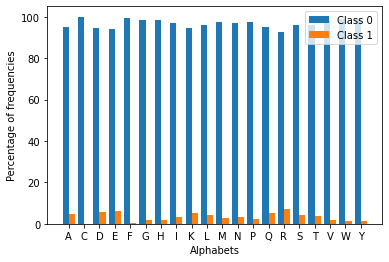

In [126]:
#Creating a grouped bar chart of the frequencies (%) of each aminoacid letter in Positive vs Negative observations
labels = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


x = np.arange(len(labels))

width = 0.40
  
# plotting data in grouped manner of bar type
plt.xticks(x, ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
plt.bar(x-0.2, list1, width)
plt.bar(x+0.2, list2, width)
plt.xlabel("Alphabets")
plt.ylabel("Percentage of frequencies")
plt.legend(["Class 0", "Class 1"])
plt.show()

A grouped bar chart of the frequencies (%) is created for each aminoacid letter in Positive vs Negative observations and the Class 0 has the highest percentage of aminoacid letters compared to Class 1.

Based on the resulting data set of (M1)-(M3), assemble an expanded data set, such that each aminoacid of each epitope sequence is represented in an individual row. This expanded data set must have a new variable called AA_window , containing a substring of length 15 centred on the specific aminoacid. 

In [127]:
#Creating a copy of dataframe
df1 = df.copy()

In [128]:
#To find the number of times each epitope sequence is repeating
a = df['end_pos'] - df['start_pos'] + 1
a

0        8
2       15
3       15
5       15
6       15
        ..
7098    12
7100    20
7101    14
7103    12
7104    20
Length: 6826, dtype: int64

In [129]:
#Repeating the dataframe a number of times 
df1 = df1.loc[df1.index.repeat(a)].reset_index(drop=True)

In [130]:
#Creating a new column for AA_position
df1['AA_position'] = df1.groupby('epit_seq').cumcount() + df1['start_pos']

In [131]:
#Creating a new column for New_start_pos
df1['New_start_pos'] = df1['AA_position'] - 7

In [132]:
#Creating a new column for New_end_pos
df1['New_end_pos'] = df1['AA_position'] + 7

In [133]:
#Printing the dataframe
df1

,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,...,bcell_id,assay_type,n_Positive,n_Negative,assay_class,Class,Epitope Length,AA_position,New_start_pos,New_end_pos
0,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,"16,746,431,674,584","34,34",2,0,"1,1",1,8,42,35,49
1,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,"16,746,431,674,584","34,34",2,0,"1,1",1,8,43,36,50
2,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,"16,746,431,674,584","34,34",2,0,"1,1",1,8,44,37,51
3,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,"16,746,431,674,584","34,34",2,0,"1,1",1,8,45,38,52
4,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,...,"16,746,431,674,584","34,34",2,0,"1,1",1,8,46,39,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102654,protein,P02977.2,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,...,1326484,34,0,1,-1,0,20,432,425,439
102655,protein,P02977.2,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,...,1326484,34,0,1,-1,0,20,433,426,440
102656,protein,P02977.2,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,...,1326484,34,0,1,-1,0,20,434,427,441
102657,protein,P02977.2,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,...,1326484,34,0,1,-1,0,20,435,428,442


The dimension is 102659 rows × 34 columns

In [134]:
#Creating a new column for the AA_window
df1['AA_window'] = df1.apply(lambda x: x['TSeq_sequence'][x['New_start_pos']-1:x['New_end_pos']], axis=1)

In [135]:
#Creating a new dataframe with the required 5 columns only
df2 = df1.filter(['protein_id','epitope_id','AA_position','AA_window','Class'])

In [136]:
#Printing the dataframe
df2

,protein_id,epitope_id,AA_position,AA_window,Class
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1
...,...,...,...,...,...
102654,P02977.2,57290,432,KPGNKAVPGKGQAPQ,0
102655,P02977.2,57290,433,PGNKAVPGKGQAPQA,0
102656,P02977.2,57290,434,GNKAVPGKGQAPQAG,0
102657,P02977.2,57290,435,NKAVPGKGQAPQAGT,0


The dimension is 102659 rows × 5 columns

#  Report the class imbalance of the expanded data set. To deal with this class imbalance you must keep all ‘positive class’ observations and randomly select 1.5*num_positive number of ‘negative class’ observations from the expanded data set; where num_positive is the number of positive observations

In [137]:
#Created a new dataframe with class 1 values only and checking its shape
df3 = df2[df2['Class'] == 1]
df3.shape

(4100, 5)

The dimension is 4100 rows × 5 columns

In [138]:
#Created a new dataframe with class 0 values only and checking its shape
df4 = df2[df2['Class'] == 0]
df4.shape

(98559, 5)

The dimension is 98559 rows × 5 columns

In [139]:
#Calculating 1.5*num_positive number of ‘negative class’
4100*1.5

6150.0

In [140]:
#Randomly selecting 1.5*num_positive number of ‘negative class’ observations from the expanded data set
df5 = df4.sample(n=6150,replace=True)

In [141]:
#Printing the dimensions of the dataframe
df5.shape

(6150, 5)

The dimension is 6150 rows × 5 columns

In [142]:
#Concatenating the two dataframes
df6 = pd.concat([df3, df5], axis=0)

In [143]:
#Created a copy of the dataframe
df7 = df6.copy()

In [144]:
#Shape of the dataframe
df7.shape

(10250, 5)

The dimension is 10250 rows × 5 columns

#  Calculation of features related to the letters in the AA_window sequences calculated in (M5): 20 features for the frequency of each individual letter;400 features related to the frequency of each possible pair of letters.

In [145]:
#The list of the alphabets present in the AA_window
test_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

In [146]:
#Creating a for loop for calculating the frequency of each individual letter
for i in test_list:
    df6[i] = (df6['AA_window'].str.count(i)/15)
 

In [147]:
#Printing the updated dataframe
df6.head()

,protein_id,epitope_id,AA_position,AA_window,Class,A,C,D,E,F,...,M,N,P,Q,R,S,T,V,W,Y
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,0.066667,0.0,0.066667,0.066667,0.066667,...,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,0.066667,0.0,0.066667,0.133333,0.000000,...,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0


In [148]:
#Finding the possible pairs of letters.
output1 = []
for i in range(0,len(test_list)):
    for j in range(0,len(test_list)):
        a= (test_list[i],test_list[j])
        str = ''.join(a)
        output1.append(str)
(output1)

['AA',
 'AC',
 'AD',
 'AE',
 'AF',
 'AG',
 'AH',
 'AI',
 'AK',
 'AL',
 'AM',
 'AN',
 'AP',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AV',
 'AW',
 'AY',
 'CA',
 'CC',
 'CD',
 'CE',
 'CF',
 'CG',
 'CH',
 'CI',
 'CK',
 'CL',
 'CM',
 'CN',
 'CP',
 'CQ',
 'CR',
 'CS',
 'CT',
 'CV',
 'CW',
 'CY',
 'DA',
 'DC',
 'DD',
 'DE',
 'DF',
 'DG',
 'DH',
 'DI',
 'DK',
 'DL',
 'DM',
 'DN',
 'DP',
 'DQ',
 'DR',
 'DS',
 'DT',
 'DV',
 'DW',
 'DY',
 'EA',
 'EC',
 'ED',
 'EE',
 'EF',
 'EG',
 'EH',
 'EI',
 'EK',
 'EL',
 'EM',
 'EN',
 'EP',
 'EQ',
 'ER',
 'ES',
 'ET',
 'EV',
 'EW',
 'EY',
 'FA',
 'FC',
 'FD',
 'FE',
 'FF',
 'FG',
 'FH',
 'FI',
 'FK',
 'FL',
 'FM',
 'FN',
 'FP',
 'FQ',
 'FR',
 'FS',
 'FT',
 'FV',
 'FW',
 'FY',
 'GA',
 'GC',
 'GD',
 'GE',
 'GF',
 'GG',
 'GH',
 'GI',
 'GK',
 'GL',
 'GM',
 'GN',
 'GP',
 'GQ',
 'GR',
 'GS',
 'GT',
 'GV',
 'GW',
 'GY',
 'HA',
 'HC',
 'HD',
 'HE',
 'HF',
 'HG',
 'HH',
 'HI',
 'HK',
 'HL',
 'HM',
 'HN',
 'HP',
 'HQ',
 'HR',
 'HS',
 'HT',
 'HV',
 'HW',
 'HY',
 'IA',
 'IC',
 'ID',

In [149]:
#Number of pairs of letters.
len(output1)

400

In [150]:
#Creating a for loop for calculating the frequency of each pairs of letters.
for i in output1:
    df6[i] = (df6['AA_window'].str.count(i)/14)
 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[i] = (df6['AA_window'].str.count(i)/14)
C:\Users\jagan\AppData\Local\Temp/ipykernel_4252/1105006959.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [151]:
#Printing the dataframe
df6.head()

,protein_id,epitope_id,AA_position,AA_window,Class,A,C,D,E,F,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,0.066667,0.0,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,0.066667,0.0,0.066667,0.133333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Splitting of the expanded dataset into training (80%) and testing (20%) set based on the protein_id value (i.e., all epitopes with the same protein_id should be under the same split) after M5.


In [152]:
#Printing the unique values in protein id column
df6.protein_id.unique()

array(['AAB20743.1', 'AAK34531.1', 'AAP32473.1', 'AAQ94545.1',
       'AIX11592.1', 'BAA84192.1', 'BAQ50613.1', 'BAQ51534.1',
       'BAQ51774.1', 'CAA50980.1', 'KGE58834.1', 'P02977.2', 'P49054.1',
       'Q54718', 'Q9A147', 'WP_010922618.1', 'WP_011285659.1',
       'WP_011888591.1', 'WP_029714098.1', 'WP_031499502.1',
       'WP_032459783.1', 'WP_032459949.1', 'WP_032460349.1',
       'WP_032460904.1', 'WP_032461108.1', 'WP_032464658.1',
       'WP_032467245.1', 'WP_033887766.1', 'WP_033888368.1',
       'WP_038434302.1', 'WP_041174322.1', 'WP_042765264.1',
       'WP_043885001.1', 'WP_043885056.1', 'WP_044555101.1',
       'WP_047235188.1', 'WP_136048133.1', 'WP_032460428.1',
       'WP_010921999.1', 'KGE60983.1', 'WP_044555078.1', 'WP_030126514.1',
       'WP_041174298.1', 'WP_043885003.1', 'BAQ51775.1', 'WP_038432373.1',
       'WP_038431208.1', 'KGE58824.1', 'AIW04906.1', 'WP_032464869.1',
       'WP_027972762.1', 'KGE59420.1', 'WP_038434244.1', 'WP_038432629.1',
       'P12379.

In [153]:
#Using GroupShuffleSplit to split the expanded dataset into training (80%) and testing (20%) set based on the protein_id value 
from sklearn.model_selection import GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df6, groups=df6['protein_id'])
train_inds, test_inds = next(split)

train = df6.iloc[train_inds]
test = df6.iloc[test_inds]

In [154]:
#Printing unique values in protein column in train dataset
train.protein_id.unique()

array(['AAB20743.1', 'AAK34531.1', 'AAP32473.1', 'AAQ94545.1',
       'AIX11592.1', 'BAA84192.1', 'BAQ50613.1', 'BAQ51534.1',
       'BAQ51774.1', 'KGE58834.1', 'P02977.2', 'P49054.1', 'Q54718',
       'Q9A147', 'WP_010922618.1', 'WP_011888591.1', 'WP_029714098.1',
       'WP_031499502.1', 'WP_032459783.1', 'WP_032460349.1',
       'WP_032461108.1', 'WP_032464658.1', 'WP_032467245.1',
       'WP_033887766.1', 'WP_033888368.1', 'WP_041174322.1',
       'WP_042765264.1', 'WP_043885001.1', 'WP_043885056.1',
       'WP_136048133.1', 'WP_032460428.1', 'WP_010921999.1', 'KGE60983.1',
       'WP_044555078.1', 'WP_030126514.1', 'WP_041174298.1',
       'WP_043885003.1', 'WP_038431208.1', 'KGE58824.1', 'AIW04906.1',
       'WP_032464869.1', 'WP_027972762.1', 'WP_038434244.1',
       'WP_038432629.1', 'KGE59296.1', 'KGE59844.1', 'WP_032463555.1',
       'WP_002989701.1', 'WP_038433871.1', 'WP_032467301.1',
       'WP_032462082.1', 'WP_032464315.1', 'WP_010922714.1', 'ESU89425.1',
       'AAK3348

In [155]:
#Printing unique values in protein column in test dataset
test.protein_id.unique()

array(['CAA50980.1', 'WP_011285659.1', 'WP_032459949.1', 'WP_032460904.1',
       'WP_038434302.1', 'WP_044555101.1', 'WP_047235188.1', 'BAQ51775.1',
       'WP_038432373.1', 'KGE59420.1', 'P12379.1', 'ESU86869.1',
       'WP_032464595.1', 'WP_032465221.1', 'CAR81698.1', 'WP_038434026.1',
       'KGE58831.1', 'WP_032464217.1', 'KGE58837.1', 'WP_020905435.1'],
      dtype=object)

In [156]:
#Printing the shape of train dataset
train.shape

(8710, 425)

In [157]:
#Printing the shape of test dataset
test.shape

(1540, 425)

# Fit a classification model using the training set and report the model’s predictive performance. Note the model should only use 420 features from (S2) and the class labels from (M3).

In [158]:
#Dropping the columns 'protein_id', 'epitope_id','AA_position' and'AA_window' of train dataset
train=train.drop(columns=['protein_id', 'epitope_id','AA_position','AA_window'])
train

,Class,A,C,D,E,F,G,H,I,K,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,1,0.066667,0.0,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.066667,0.0,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.066667,0.0,0.066667,0.133333,0.000000,0.133333,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73165,0,0.200000,0.0,0.066667,0.000000,0.066667,0.266667,0.000000,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100340,0,0.066667,0.0,0.133333,0.200000,0.000000,0.000000,0.000000,0.133333,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64891,0,0.133333,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76532,0,0.066667,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#Dropping the columns 'protein_id', 'epitope_id','AA_position' and'AA_window' of test dataset
test =test.drop(columns=['protein_id', 'epitope_id','AA_position','AA_window'])
test

,Class,A,C,D,E,F,G,H,I,K,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
10567,1,0.066667,0.0,0.200000,0.000000,0.000000,0.066667,0.000000,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10568,1,0.133333,0.0,0.200000,0.000000,0.000000,0.066667,0.000000,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10569,1,0.133333,0.0,0.200000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10570,1,0.133333,0.0,0.200000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10571,1,0.133333,0.0,0.133333,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69584,0,0.066667,0.0,0.000000,0.000000,0.000000,0.200000,0.133333,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33448,0,0.133333,0.0,0.066667,0.200000,0.000000,0.000000,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27575,0,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19775,0,0.200000,0.0,0.066667,0.133333,0.066667,0.000000,0.000000,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
#Creating x_train values
x_train = train.drop(columns ='Class')

In [161]:
#Creating y_train values
y_train=train['Class']

In [162]:
#Creating x_test values
x_test = test.drop(columns ='Class')

In [163]:
#Creating y_test values
y_test=test['Class']

In [164]:
#Importing neccessary libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

The Logistic Regression, KNN classifier, Linear SVC, NB classifier, Decision Tree and Random Forest classifiers are used as the classification models inorder to find the best accuracy. The one with the best accuracy can be used as the classification model.

In [165]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
predictions

array([1, 1, 1, ..., 0, 0, 0])

In [166]:
#Printing scores of Logistic regression
y_pred = clf.predict(x_test)
f1_LR=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Testing Accuracy:  0.44025974025974024
[[621  72]
 [790  57]]
              precision    recall  f1-score   support

           0       0.44      0.90      0.59       693
           1       0.44      0.07      0.12       847

    accuracy                           0.44      1540
   macro avg       0.44      0.48      0.35      1540
weighted avg       0.44      0.44      0.33      1540



In [167]:
#Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [168]:
#Printing scores of KNN classifier
y_pred = clf.predict(x_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.5038961038961038
[[602  91]
 [673 174]]
              precision    recall  f1-score   support

           0       0.47      0.87      0.61       693
           1       0.66      0.21      0.31       847

    accuracy                           0.50      1540
   macro avg       0.56      0.54      0.46      1540
weighted avg       0.57      0.50      0.45      1540



In [169]:
#Using Linear SVC
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [170]:
#Printing scores of Linear SVC
y_pred = clf.predict(x_test)
f1_SVC_Linear=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(x_test, y_test))

Testing Accuracy:  0.45324675324675323


In [171]:
#Using NB classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.5850649350649351
[[360 333]
 [306 541]]
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       693
           1       0.62      0.64      0.63       847

    accuracy                           0.59      1540
   macro avg       0.58      0.58      0.58      1540
weighted avg       0.58      0.59      0.58      1540



In [172]:
#Trying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cls.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [173]:
#Printing scores of decision tree classifier
y_pred = cls.predict(x_test)
f1_DT=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", cls.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.4766233766233766
[[627  66]
 [740 107]]
              precision    recall  f1-score   support

           0       0.46      0.90      0.61       693
           1       0.62      0.13      0.21       847

    accuracy                           0.48      1540
   macro avg       0.54      0.52      0.41      1540
weighted avg       0.55      0.48      0.39      1540



In [174]:
#Trying Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth= 10 , max_features= 6)
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=50)

In [175]:
#Printing scores of Random forest classifier
y_pred = clf.predict(x_test)
f1_RF=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.44675324675324674
[[668  25]
 [827  20]]
              precision    recall  f1-score   support

           0       0.45      0.96      0.61       693
           1       0.44      0.02      0.04       847

    accuracy                           0.45      1540
   macro avg       0.45      0.49      0.33      1540
weighted avg       0.45      0.45      0.30      1540



#  Calculate additional features- Shannon entropy of AA_window.

In [176]:
#Importing neccessary libraries
import collections
import math
 
#Function to calculate the shannon_entropy_value
def eta(dna_sequence):
    m = len(dna_sequence)
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1

In [177]:
#Creating a list to store the shannon_entropy_values
listshanon = []
for a in df7['AA_window']:
    listshanon.append(eta(a))

In [178]:
#Creating a column for the shannon_entropy_values
df7['entropy']=listshanon

In [179]:
#Printing the dataframe
df7

,protein_id,epitope_id,AA_position,AA_window,Class,entropy
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891
...,...,...,...,...,...,...
73165,WP_041174298.1,523640,447,ISFAPGQAGADGTYG,0,3.056565
100340,WP_044555078.1,520975,83,EDEQIANYILDLEVK,0,3.189898
64891,WP_033887766.1,530038,509,NNKYAKLSGTSMSAP,0,3.189898
76532,WP_041174322.1,518984,522,TVIPLGANSRNIRIM,0,3.323231


In [180]:
#Using BeautifulSoup package to scrape information from web page
import requests
from bs4 import BeautifulSoup
import re
import dateutil

#Requesting url
result = requests.get("https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html")
assert result.status_code==200  
src = result.content
document = BeautifulSoup(src, 'lxml')
table = document.find("table")
assert table.find("th").get_text() == "Amino acid"
rows = table.find_all("tr")  # Note: this works because find_all is resursive by default    
#Created a array 
ar =[]
#Created a for loop to go through all the rows of the table
for row in rows[1:]:
    cells = row.find_all(["td", "th"])
    
    cells_text = [cell.get_text(strip=True) for cell in cells]
    ar.append(cells_text)
    
#Created a dataframe 
df8 = pd.DataFrame(ar)
# adding column name to the respective columns
df8.columns =['Amino acid','Abbreviations','Abbreviations1','Molecular mass (Da)','Number of atoms','Volume (A3)','Hydropathy index']


In [181]:
#Function to split the words into characters
def split(word):
    return [char for char in word]

In [182]:
#Creating a series of abbreviations
abbr=df8['Abbreviations1']  

# TMM and MHI of AA_window

In [183]:
#Calculating TMM and MHI of AA_window
summ = []
meann = [] 
for i in df7['AA_window']:
    splt = split(i)
    ad = 0
    mm = 0
    mma = 0
    for e in splt:
        
        coll=df8[df8.Abbreviations1.str.contains(e)]
        val=int(coll['Molecular mass (Da)'].values)
        hi=float(coll['Hydropathy index'].values)
        ad = ad + val
        mm = (mm + hi)
        mma= mm/len(splt)
        
    summ.append(ad)
    meann.append(mma)
        

In [184]:
#Creating a new column for TMM
df7['TMM'] = summ

In [185]:
#Creating a new column for HMI
df7['HMI'] = meann

In [186]:
#Displaying the dataframe
df7.head()

,protein_id,epitope_id,AA_position,AA_window,Class,entropy,TMM,HMI
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667


# Calculate Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window.

In [187]:
#Creating a dictionary using hardcoding of the values provided in the table
data = {'AA code':['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'], 'Carbon':[3,3,4,5,9,2,6,6,
6,6,5,4,5,5,6,3,4,5,11,9], 'Hydrogen':[7,7,7,9,11,5,9,13,14,13,11,8,9,10,14,7,9,11,12,11], 'Nitrogen': [1,1,1,1,1,1,3,1,2,1,
1,2,1,2,4,1,1,1,2,1],'Oxygen':[2,2,4,4,2,2,2,2,2,2,2,3,2,3,2,3,3,2,2,3],'Sulphur':[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]}  

In [188]:
#Creating a dataframe from the dictionary values
df9 = pd.DataFrame(data)

In [189]:
#Displaying the dataframe
df9.head()

,AA code,Carbon,Hydrogen,Nitrogen,Oxygen,Sulphur
0,A,3,7,1,2,0
1,C,3,7,1,2,1
2,D,4,7,1,4,0
3,E,5,9,1,4,0
4,F,9,11,1,2,0


In [190]:
#Code to calculate Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window
c = []
h = []
n = []
o = []
s = []
for i in df7['AA_window']:
    splt = split(i)
    add = 0
    hh = 0
    nn = 0
    oo = 0
    ss = 0
    for e in splt:
        col=df9[df9['AA code'].str.contains(e)]
        val=int(col['Carbon'].values)
        h1=int(col['Hydrogen'].values)
        h2=int(col['Nitrogen'].values)
        h3=int(col['Oxygen'].values)
        h4=int(col['Sulphur'].values)
        add = add + val
        hh = hh + h1
        nn = nn + h2
        oo = oo + h3
        ss = ss + h4

    c.append(add)
    h.append(hh)
    n.append(nn)
    o.append(oo)
    s.append(ss)

In [191]:
#Creating new columns for Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms
df7['Number_of_carbon'] = c
df7['Number_of_hydrogen'] = h
df7['Number_of_nitrogen'] = n
df7['Number_of_oxygen'] = o
df7['Number_of_sulphur'] = s

In [192]:
#Displaying the dataframe
df7.head()

,protein_id,epitope_id,AA_position,AA_window,Class,entropy,TMM,HMI,Number_of_carbon,Number_of_hydrogen,Number_of_nitrogen,Number_of_oxygen,Number_of_sulphur
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,80,151,21,36,0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,76,143,21,36,0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,76,143,21,36,0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,71,141,21,37,0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,67,139,21,39,0


# Develop high-quality visualisations of the main characteristics of the results from (C1)

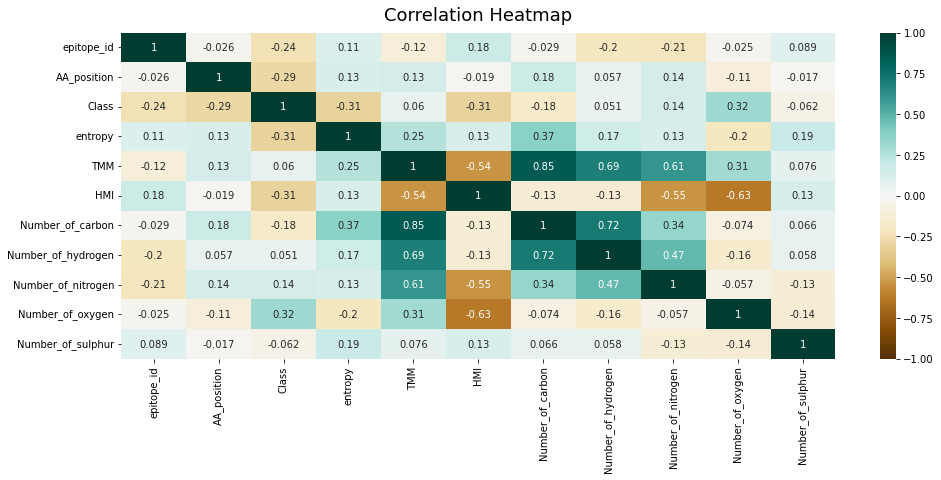

In [193]:
#Creating a Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df7.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

The Correlation heatmap is a used to find how strong the features are related to each other. TMM and Number of carbons are highly correlated. 

In [194]:
#Creating a new dataframe for visualisation
df8 = df7.filter(['Class','entropy','TMM','HMI'])

In [195]:
#Resetting the index and dropping
df8.reset_index(inplace=True)
df8.drop("index", axis=1, inplace=True)

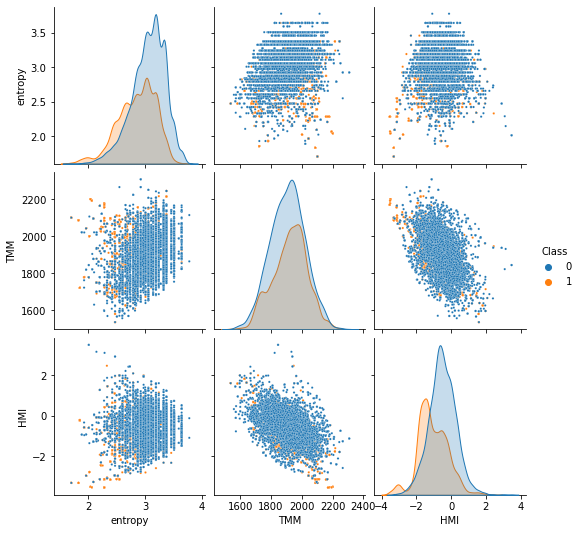

In [196]:
#Creating a pair plot for entropy,TMM and HMI
sns.pairplot(df8, hue = 'Class', markers = 'o', plot_kws={"s":5})
plt.show()

The Pair plot is used to understand the best set of features to explain a relationship between the Shannon entropy, TMM and HMI. It can be clearly seen that Class 0 has high values of pairs compared to Class 1 values.

In [197]:
#Creating a new dataframe for atom components
df10=df7[['Number_of_carbon', 'Number_of_hydrogen', 'Number_of_nitrogen', 'Number_of_oxygen','Number_of_sulphur']]

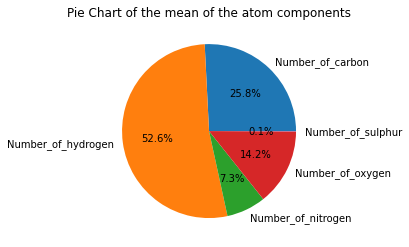

In [198]:
#Creating a pie chart of the mean of the atom components
df10.mean().plot.pie(ylabel='',title='Pie Chart of the mean of the atom components',autopct='%0.1f%%')
plt.show()

The Pie chart is used to show the relationship of parts to the whole of the Atom components. The number of hydrogen has the majority of the components whereas the number of sulphur is very less in comparison.

# Conclusion

The exploratory data analysis, merging the two datasets, data pre-processing, feature engineering, modelling and data visualisations are done and the classification models are trained and fit by dividing the dataset into train and test. The model with the highest accuracy is used to find whether it belongs to the class 0 or class 1 based on the input data. Thus, data analysis is done and the best classification model can be used to determine the class.